In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob 
import warnings

warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format", lambda x:"%.2f"%x)
pd.set_option("display.width",200)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df=pd.read_csv("/kaggle/input/wikipedia-movie-plots/wiki_movie_plots_deduped.csv")

In [30]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [31]:
df.shape

(34886, 8)

In [32]:
df.isnull().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [34]:
df[df.isna()]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
34881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.duplicated().sum()

0

In [36]:
df.dropna(inplace=True)


In [37]:
df.shape

(33464, 8)

In [38]:
df.isnull().sum()

Release Year        0
Title               0
Origin/Ethnicity    0
Director            0
Cast                0
Genre               0
Wiki Page           0
Plot                0
dtype: int64

In [39]:
df=df[: 2000]

In [40]:
df["Plot"][5]

'Alice follows a large white rabbit down a "Rabbit-hole". She finds a tiny door. When she finds a bottle labeled "Drink me", she does, and shrinks, but not enough to pass through the door. She then eats something labeled "Eat me" and grows larger. She finds a fan when enables her to shrink enough to get into the "Garden" and try to get a "Dog" to play with her. She enters the "White Rabbit\'s tiny House," but suddenly resumes her normal size. In order to get out, she has to use the "magic fan."\r\nShe enters a kitchen, in which there is a cook and a woman holding a baby. She persuades the woman to give her the child and takes the infant outside after the cook starts throwing things around. The baby then turns into a pig and squirms out of her grip. "The Duchess\'s Cheshire Cat" appears and disappears a couple of times to Alice and directs her to the Mad Hatter\'s "Mad Tea-Party." After a while, she leaves.\r\nThe Queen invites Alice to join the "ROYAL PROCESSION": a parade of marching 

# Text Preprocessing

In [41]:
def CleanText(text):
    # Normalization
    text = text.str.lower()
    # removing punctuations
    text = text.str.replace(r'[^\w\s]', '')
    text = text.str.replace("\n", '')
    # digits
    text = text.str.replace('\d', '')
    return text

df["Plot"] = CleanText(df["Plot"])

In [42]:
df["Plot"][5]

'alice follows a large white rabbit down a "rabbit-hole". she finds a tiny door. when she finds a bottle labeled "drink me", she does, and shrinks, but not enough to pass through the door. she then eats something labeled "eat me" and grows larger. she finds a fan when enables her to shrink enough to get into the "garden" and try to get a "dog" to play with her. she enters the "white rabbit\'s tiny house," but suddenly resumes her normal size. in order to get out, she has to use the "magic fan."\rshe enters a kitchen, in which there is a cook and a woman holding a baby. she persuades the woman to give her the child and takes the infant outside after the cook starts throwing things around. the baby then turns into a pig and squirms out of her grip. "the duchess\'s cheshire cat" appears and disappears a couple of times to alice and directs her to the mad hatter\'s "mad tea-party." after a while, she leaves.\rthe queen invites alice to join the "royal procession": a parade of marching play

In [43]:
def RemoveStopWords(text):
    stop_words = stopwords.words('english')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return text

In [44]:
df["Plot"] = RemoveStopWords(df["Plot"])
df['Plot'][5]

'alice follows large white rabbit "rabbit-hole". finds tiny door. finds bottle labeled "drink me", does, shrinks, enough pass door. eats something labeled "eat me" grows larger. finds fan enables shrink enough get "garden" try get "dog" play her. enters "white rabbit\'s tiny house," suddenly resumes normal size. order get out, use "magic fan." enters kitchen, cook woman holding baby. persuades woman give child takes infant outside cook starts throwing things around. baby turns pig squirms grip. "the duchess\'s cheshire cat" appears disappears couple times alice directs mad hatter\'s "mad tea-party." while, leaves. queen invites alice join "royal procession": parade marching playing cards others headed white rabbit. alice "unintentionally offends queen", latter summons "executioner". alice "boxes ears", flees playing cards come her. wakes realizes dream.'

In [45]:
drop = pd.Series(' '.join(df["Plot"]).split()).value_counts()[-1000:]
drop

imogene       1
muskets       1
glory"        1
$2500         1
clamor        1
             ..
jeanie.       1
carload       1
unlocks       1
cheats.       1
matriarch,    1
Name: count, Length: 1000, dtype: int64

In [46]:
df["Plot"] = df['Plot'].apply(lambda x: " ".join(x for x in x.split() if x not in drop))

In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
df['Plot'].apply(lambda x: TextBlob(x).words)

5       [alice, follows, large, white, rabbit, rabbit-...
13      [boone, 's, daughter, befriends, indian, maide...
14      [heading, baseball, game, nearby, sports, fan,...
15      [plot, black, woman, going, dentist, toothache...
16      [beautiful, summer, day, father, mother, take,...
                              ...                        
2016    [shelby, barret, stable, hand, rides, show, ho...
2017    [edited, duke, jeanie, outlaw, couple, hiding,...
2018    [card, sharp, steps, mexican, family, 's, ranc...
2019    [nick, nora, charles, return, vacation, home, ...
2020    [meek, clerk, elmer, lamb, mind, figures, much...
Name: Plot, Length: 2000, dtype: object

In [49]:
# tf-idf = Term Frequency - Inverse Document Frequency

tf = df["Plot"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf.head(15)

,index,0
0,alice,104.00
1,get,707.00
2,finds,678.00
3,her.,678.00
4,enters,93.00
5,playing,75.00
6,cards,19.00
7,white,133.00
8,labeled,2.00
9,door.,22.00


In [50]:
tf.columns = ['words', 'tf']

In [51]:
tf.sort_values('tf', ascending = False)

,words,tf
166,one,1034.00
525,love,976.00
526,him.,913.00
863,tells,863.00
370,"however,",843.00
...,...,...
13297,flags,1.00
6593,vangy,1.00
6592,vangy.,1.00
6590,hammering,1.00


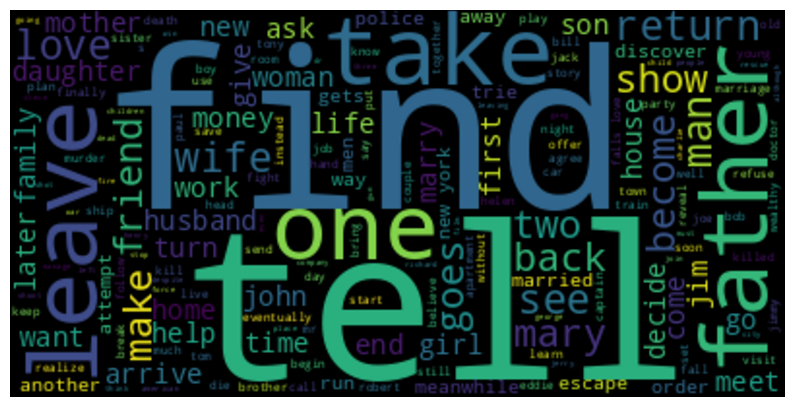

In [52]:
plt.figure(figsize=(10,8))
text = " ".join(i for i in df["Plot"])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = "mitchell")
plt.axis('off')
plt.show()

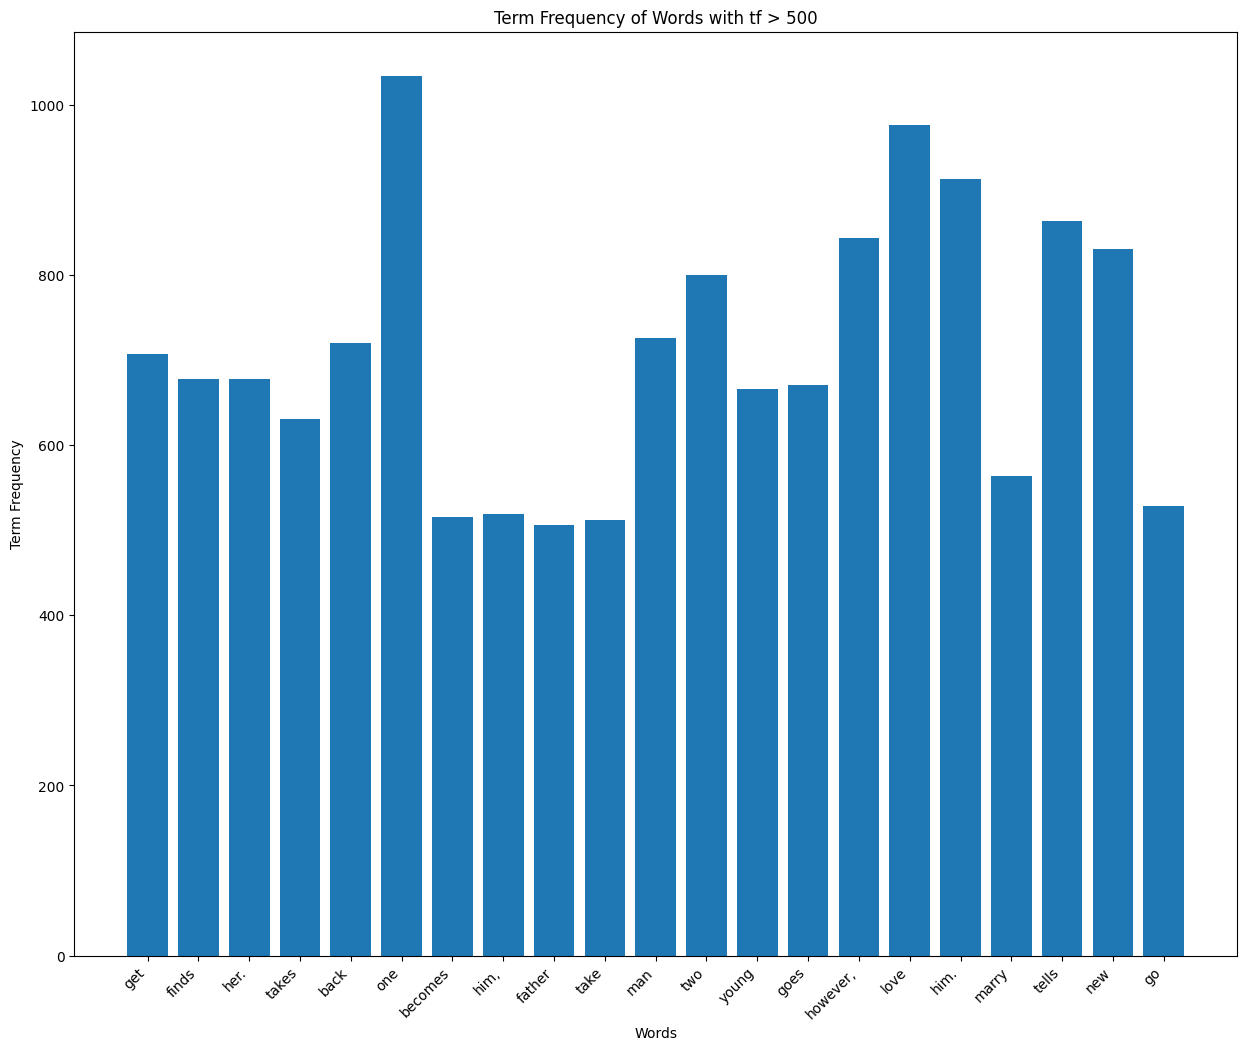

In [54]:


# Create a larger figure
plt.figure(figsize=(15, 12))

# Plot the bar chart using Matplotlib directly
plt.bar(tf[tf["tf"] > 500]['words'], tf[tf["tf"] > 500]['tf'])

# Set labels and title
plt.xlabel('Words')
plt.ylabel('Term Frequency')
plt.title('Term Frequency of Words with tf > 500')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()
